<a href="https://colab.research.google.com/github/rajiv6741/ML_Assignment_1/blob/main/hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt 


# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
training_df = pd.read_csv('train.csv')
testing_df = pd.read_csv('test.csv')
def read_and_concat_dataset(training_path, test_path):
    train = pd.read_csv(training_path)
    train['train'] = 1
    test = pd.read_csv(test_path)
    test['train'] = 0
    dataset = train.append(test, ignore_index=True)
    return train, test, dataset

train, test, dataset = read_and_concat_dataset('train.csv', 'test.csv')
dataset = dataset.set_index('PassengerId')
print(dataset.columns.values)

['Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked' 'train']


In [ ]:
dataset.shape
dataset.head()
training_df.head()
testing_df.head()
dataset.describe()
training_df.describe(include=['O'])



,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [ ]:
#checking the corelation between the pclass and survived so that we can check our observations are matching or not
training_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
#checking the corelation between the sex and survived so that we can check our observations are matching or not 
training_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
#checking the corelation between the parch and survived so that we can check our observations are matching or not
training_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


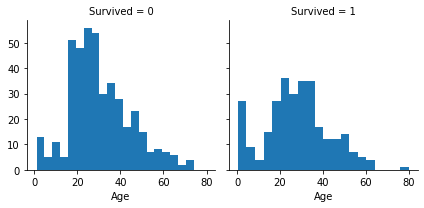

In [ ]:
#By visualizing the data we can analyze on how to proceed it
g = sns.FacetGrid(training_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

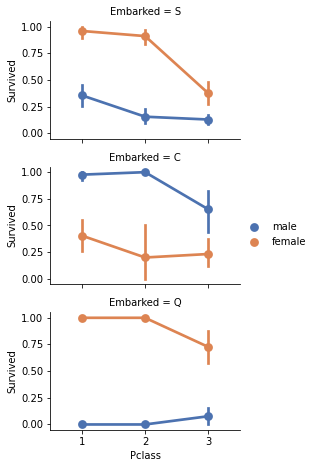

In [ ]:
#By visualizing this we can analyze on how to proceed it
grid = sns.FacetGrid(training_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

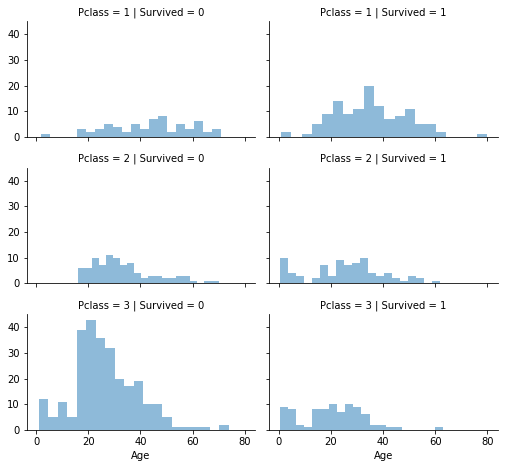

In [ ]:
#By visualizing the data we can analyze on how to proceed it
grid = sns.FacetGrid(training_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

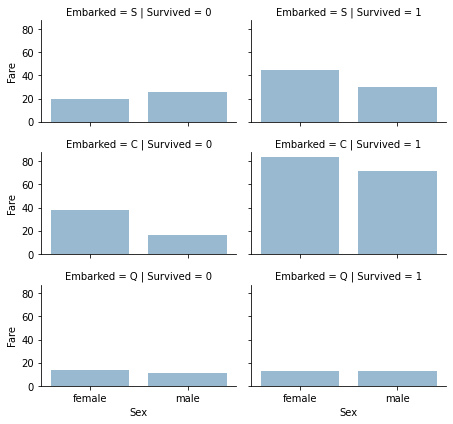

In [ ]:
#By visualizing the data we can analyze on how to proceed it
grid = sns.FacetGrid(training_df, row='Embarked', col='Survived', size=2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)

In [ ]:
dataset.isnull().sum()
dataset.groupby('Pclass').Fare.mean()
print(dataset.Embarked.value_counts())

S    914
C    270
Q    123
Name: Embarked, dtype: int64


In [ ]:
dataset.Embarked = dataset.Embarked.fillna('S')
dataset.Fare = dataset.Fare.fillna(0)
dataset.Cabin = dataset.Cabin.fillna('Unknown_Cabin')
dataset['Cabin'] = dataset['Cabin'].str[0]
dataset.groupby('Pclass').Cabin.value_counts()
dataset['Cabin'] = np.where((dataset.Pclass==1) & (dataset.Cabin=='U'),'C',
                                            np.where((dataset.Pclass==2) & (dataset.Cabin=='U'),'D',
                                                                        np.where((dataset.Pclass==3) & (dataset.Cabin=='U'),'G',
                                                                                                    np.where(dataset.Cabin=='T','C',dataset.Cabin))))

In [ ]:
training_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [ ]:
pd.crosstab(dataset['Title'], dataset['Sex'])
dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')

dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [ ]:
training_df['Title'] = dataset['Title'][:891]
testing_df['Title'] = dataset['Title'][891:]
training_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()
dataset.groupby('Title').Age.mean()
dataset['Age'] = np.where((dataset.Age.isnull()) & (dataset.Title=='Master'),5,
                        np.where((dataset.Age.isnull()) & (dataset.Title=='Miss'),22,
                                 np.where((dataset.Age.isnull()) & (dataset.Title=='Mr'),32,
                                          np.where((dataset.Age.isnull()) & (dataset.Title=='Mrs'),37,
                                                  np.where((dataset.Age.isnull()) & (dataset.Title=='Other'),45,
                                                           np.where((dataset.Age.isnull()) & (dataset.Title=='Dr'),44,dataset.Age))))))                   
training_df['Age'] = dataset['Age'][:891]
testing_df['Age'] = dataset['Age'][891:]

In [ ]:
dataset.isnull().sum()
dataset['FamilySize'] = dataset.SibSp + dataset.Parch + 1
dataset['Mother'] = np.where((dataset.Title=='Mrs') & (dataset.Parch >0),1,0)
dataset['Women'] = np.where(dataset.Sex=='female',1,0)
dataset = dataset.drop(['SibSp','Parch','Sex','Ticket','Name'],axis=1)
bins = [0,12,24,45,60,dataset.Age.max()]
labels = ['Child', 'Teen', 'Adult','Older Adult','Senior']
dataset["Age"] = pd.cut(dataset["Age"], bins, labels = labels)
dataset = pd.get_dummies(dataset)

In [ ]:
X_train = training_df.drop("Survived", axis=1)
Y_train = training_df["Survived"]
X_test  = testing_df.copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 12), (891,), (418, 12))

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(dataset[dataset.Survived.isnull()==False].drop('Survived',axis=1),dataset.Survived[dataset.Survived.isnull()==False],test_size=0.30, random_state=2019)
Results = pd.DataFrame({'Model': [],'Accuracy Score': [], 'Recall':[], 'F1score':[]})

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators=2500, max_depth=4)
random.fit(xtrain, ytrain)
y_pred = random.predict(xtest)

In [ ]:
from sklearn.metrics import accuracy_score
res = pd.DataFrame({"Model":['RandomForestClassifier'],
                    "Accuracy Score": [accuracy_score(y_pred,ytest)],
                   "Recall": [recall_score(ytest, y_pred)],
                   "F1score": [f1_score(ytest, y_pred)]})
Results = Results.append(res)
pd.crosstab(ytest, y_pred, rownames=['Real data'], colnames=['Predicted'])

Q1.   2) Plotting the Decision Tree.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
descion_tree= DecisionTreeClassifier(max_depth=4)
descion_tree.fit(xtrain, ytrain)
y_pred = descion_tree.predict(xtest)
res = pd.DataFrame({"Model":['DecisionTreeClassifier'],
                    "Accuracy Score": [accuracy_score(y_pred,ytest)],
                   "Recall": [recall_score(ytest, y_pred)],
                   "F1score": [f1_score(ytest, y_pred)]})
Results = Results.append(res)

In [ ]:
pd.crosstab(ytest, y_pred, rownames=['Real data'], colnames=['Predicted'])

Predicted,0.0,1.0
Real data,,
0.0,163,13
1.0,32,60


In [ ]:
from sklearn import tree
import graphviz
data = tree.export_graphviz(descion_tree, out_file=None, 
                                filled=True)

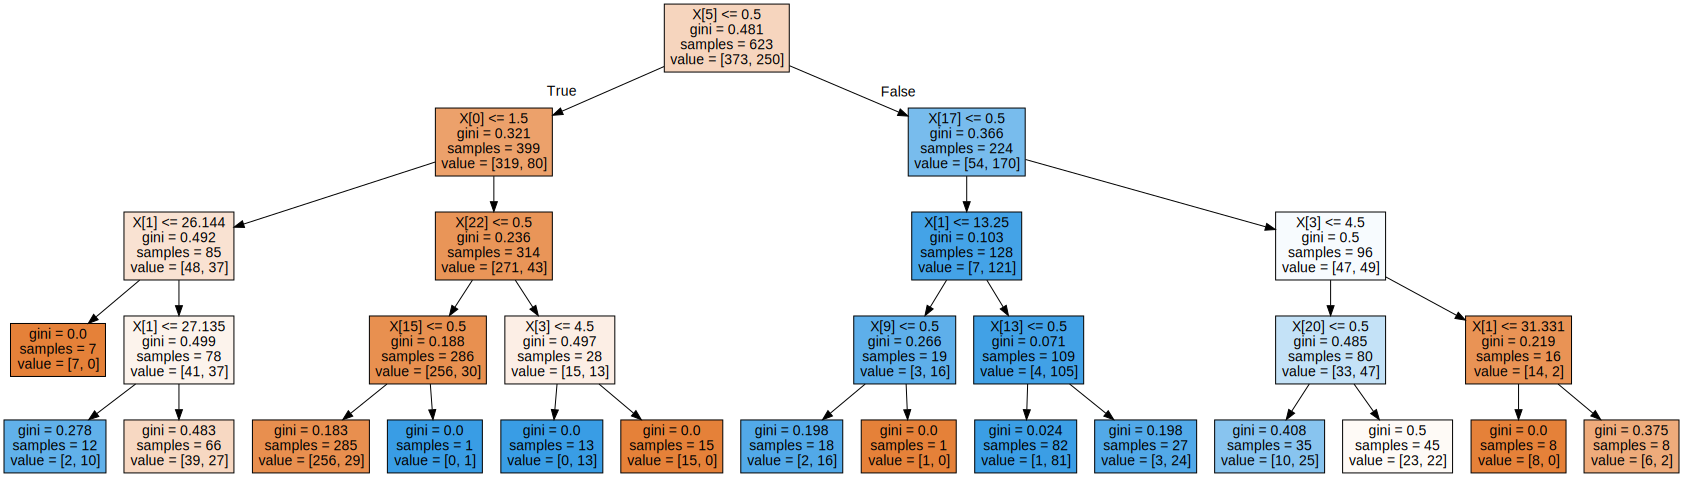

In [ ]:
# Draw graph
graph = graphviz.Source(data, format="png") 
graph


Q1.  3) Applying Five Fold cross-validation 

In [ ]:
# Applying Five Fold cross validation for Decision Tree.
from sklearn.model_selection import cross_val_score
scores = cross_val_score(descion_tree, xtrain, ytrain, cv=5, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())
print("Average Classification Accuracy:", round(scores.mean(),4)*100)

Scores: [0.808      0.84       0.76       0.82258065 0.77419355]
Mean: 0.8009548387096774
Standard Deviation: 0.029783552158672167
Average Classification Accuracy: 80.10000000000001


Q1. 4) Applying Five Fold cross-validation to the Random Forest 

In [ ]:
# Applying Five Fold cross validation for Random Forest 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(random, xtrain, ytrain, cv=5, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())
print("Average Classification Accuracy:", round(scores.mean(),4)*100)

Scores: [0.832      0.808      0.768      0.80645161 0.83064516]
Mean: 0.8090193548387099
Standard Deviation: 0.02317759871526891
Average Classification Accuracy: 80.9
